This lab focuses on Markov Decision Process Method to solve Reinforcement Learning problems

In [264]:
import numpy as np
import matplotlib.pyplot as plt

In [265]:
#initialize all the rewards from the given table
rewards = {
    ((1, 1), (1, 2)): 1,
    ((1, 1), (2, 1)): 2/3,
    ((1, 2), (1, 1)): 1/2,
    ((1, 2), (1, 3)): 3/2,
    ((1, 2), (2, 2)): 2,
    ((1, 3), (1, 2)): 1/2,
    ((1, 3), (2, 3)): 5/2,
    ((2, 1), (1, 1)): 1/3,
    ((2, 1), (2, 2)): 4/3,
    ((2, 1), (3, 1)): 3/2,
    ((2, 2), (1, 2)): 1/4,
    ((2, 2), (2, 1)): 1/3,
    ((2, 2), (2, 3)): 3/2,
    ((2, 2), (3, 2)): 3,
    ((2, 3), (1, 3)): 1/4,
    ((2, 3), (2, 2)): 1,
    ((2, 3), (3, 3)): 7/2,
    ((3, 1), (2, 1)): 1/2,
    ((3, 1), (3, 2)): 3/2,
    ((3, 2), (2, 2)): 4/5,
    ((3, 2), (3, 1)): 1,
    ((3, 2), (3, 3)): 3,
    ((3, 3), (2, 3)): 1/2,
    ((3, 3), (3, 2)): 4/5
}

In [266]:
# Defining the components of the MDP problem
#set of actions
actions = {
    0: (-1, 0),  # Up
    1: (1, 0),   # Down
    2: (0, -1),  # Left
    3: (0, 1)    # Right
}
#set of states 
states = [(i, j) for i in range(1, 4) for j in range(1, 4)]

def normalize_state(state):
    return tuple(int(x) for x in state)

# Normalize every state in the list (to avoid some problems)
states = [normalize_state(s) for s in states]

#discount rate 
gamma = 0.7
#the rewards function 
def reward(curr_state, action, next_state):
  if curr_state == next_state:
    return -1
  else:
    return rewards.get((curr_state, next_state), -1)
#the transition function 
def transition_fun(curr_state, action): 
    next_state = (curr_state[0] + action[0], curr_state[1] + action[1])
    if next_state in states: 
        return next_state
    else: 
        return curr_state

In [267]:
#initialization of the first policy pi1
pi1= {}
for (i, j) in states:
  if i != 3 :
    proba= [0, 1, 0, 0]
  else:
    proba= [0, 0, 0, 1]
  pi1[(i,j)]= proba

#initialization of the first policy pi3
pi3 = {}
for (i, j) in states:
  proba = [1/4, 1/4, 1/4, 1/4]
  pi3[(i, j)]= proba

#initialization of the first policy pi2
pi2 = {}
for (i, j) in states:
  if (i==2) and (j==2):
    proba= [1/4, 1/4, 1/4, 1/4]
  elif (i!= 2) and (j!= 2):
    if (i==j==1):
      proba= [0, 1/2, 0, 1/2]
    elif (i==j==3):
      proba= [1/2, 0, 1/2, 0]
    elif (i==1) and (j==3):
      proba= [0, 1/2, 1/2, 0]
    elif (i==3) and (j==1):
      proba= [1/2, 0, 0, 1/2]
  elif ((i==2) and (j!=2)) or ((i!=2) and (j==2)):
    if (i==2) and (j==1):
      proba = [0, 0, 0, 1]
    elif (i==2) and (j==3):
      proba = [0, 0, 1, 0]
    elif (i==1) and (j==2):
      proba = [0, 1, 0, 0]
    else:
      proba= [1, 0, 0, 0]
  pi2[(i, j)]= proba

print(pi1)
print(pi2)
print(pi3)

{(1, 1): [0, 1, 0, 0], (1, 2): [0, 1, 0, 0], (1, 3): [0, 1, 0, 0], (2, 1): [0, 1, 0, 0], (2, 2): [0, 1, 0, 0], (2, 3): [0, 1, 0, 0], (3, 1): [0, 0, 0, 1], (3, 2): [0, 0, 0, 1], (3, 3): [0, 0, 0, 1]}
{(1, 1): [0, 0.5, 0, 0.5], (1, 2): [0, 1, 0, 0], (1, 3): [0, 0.5, 0.5, 0], (2, 1): [0, 0, 0, 1], (2, 2): [0.25, 0.25, 0.25, 0.25], (2, 3): [0, 0, 1, 0], (3, 1): [0.5, 0, 0, 0.5], (3, 2): [1, 0, 0, 0], (3, 3): [0.5, 0, 0.5, 0]}
{(1, 1): [0.25, 0.25, 0.25, 0.25], (1, 2): [0.25, 0.25, 0.25, 0.25], (1, 3): [0.25, 0.25, 0.25, 0.25], (2, 1): [0.25, 0.25, 0.25, 0.25], (2, 2): [0.25, 0.25, 0.25, 0.25], (2, 3): [0.25, 0.25, 0.25, 0.25], (3, 1): [0.25, 0.25, 0.25, 0.25], (3, 2): [0.25, 0.25, 0.25, 0.25], (3, 3): [0.25, 0.25, 0.25, 0.25]}


In [268]:
#Define the function that selects the actions based on the selected policy
def action_selection (curr_state, pi, actions= actions):
  probs = pi[curr_state]
  action_keys = list(actions.keys())
  # Randomly sample one action according to its probability (this works with all policies)
  chosen_action = np.random.choice(action_keys, p=probs)
  chosen_action = actions[int(chosen_action)]
  return  chosen_action

#Define a function that return a trajectory following a single episode
def get_episode(pi, nbr_steps, starting_state):
  episode = []
  curr_state = starting_state
  while nbr_steps > 0:
    action = action_selection(curr_state, pi)
    next_state = transition_fun(curr_state, action)
    reward_ = reward(curr_state, action, next_state)
    episode.append((curr_state, action, reward_))
    curr_state = next_state
    nbr_steps -= 1
  return episode

def get_returns (episode, gamma):
  g=0
  returns = {}
  #we calculate the returns starting from the last state going back all the way to the first state 
  for s, a ,r in reversed(episode):
    g = r + gamma * g
    #the returns is a dict where --> keys : states , values : an array of returns 
    if s in returns:
      returns[s].append(g)
    else:
      returns[s] = [g]
  return returns

In [269]:
def monte_carlo_ (starting_state, eps_len, pi, gamma, nb_eps): 
    #initializing the value_funtion to 0 for all states at the beginning
    value_function = {s: 0 for s in states}

    #we're going to generate an episode for np_eps times 
    for _ in range(nb_eps+1): 
        episode= get_episode(pi, eps_len, starting_state)
        #we calculate the returns of each episode
        returns= get_returns(episode, gamma)
        for key, value in returns.items():
            value_function[key] = np.round(np.mean(value), 2)

    print(value_function.values)
    return value_function

In [270]:
def plot_function(v):
    grid = np.zeros((3, 3))
    for (i, j), value in v.items():
        grid[i-1, j-1] = value 

    plt.imshow(grid, cmap='Greys', origin='upper')

    # Add value labels in each cell
    for i in range(3):
        for j in range(3):
            plt.text(j, i, f'{grid[i, j]:.2f}', ha='center', va='center', color='r', fontsize=16)

    plt.xticks([])
    plt.yticks([])
    plt.title("Value Function")
    plt.show()

<built-in method values of dict object at 0x11a97d700>


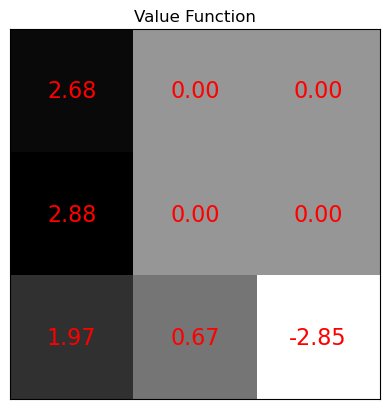

In [271]:
starting_state = (1,1)
eps_len = 20
nb_eps = 1000

v1 = monte_carlo_(starting_state, eps_len, pi1, gamma, nb_eps)
plot_function(v1)

<built-in method values of dict object at 0x11abe8c80>


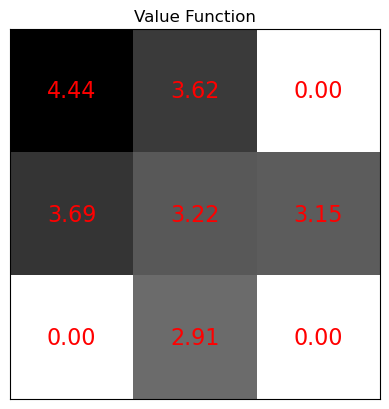

In [272]:
v2 = monte_carlo_(starting_state, eps_len, pi2, gamma, nb_eps)
plot_function(v2)

<built-in method values of dict object at 0x11abea480>


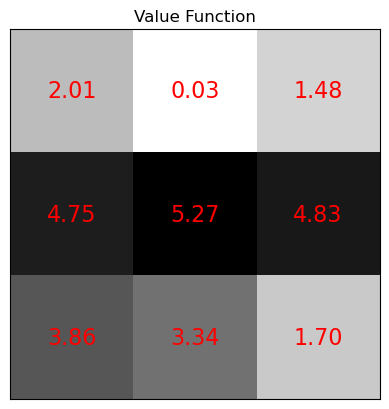

In [273]:
v3 = monte_carlo_(starting_state, eps_len, pi3, gamma, nb_eps)
plot_function(v3)
